<a href="https://colab.research.google.com/github/LlucCM/Practica_1_Equacio_Schrodinger/blob/main/Pr%C3%A0ctica_1_Eq_Schr%C3%B6dinger_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# El potencial mínim del pou doble presenta l'estructura V = b·x⁴-c·x²
def getV(x):
    b = 1
    c = 6
    potvalue = b*x**4-c*x**2
    return potvalue

In [4]:
#Discretitzem la equació en n punts
def Eq(n,h,x):
    F = np.zeros([n,n])
    for i in range(0,n):
        F[i,i] = -2*((h**2)*getV(x[i]) + 1)
        if i > 0:
           F[i,i-1] = 1
           if i < n-1:
              F[i,i+1] = 1
    return F

In [5]:
# Els intervals per calcular la funció d'ona[-L/2,L/2]
L = 8
xlower = -L/2.0
xupper = L/2.0

#paràmetre discretització
h = 0.02

#Coordenades per obtenir solució numèrica
x = np.arange(xlower,xupper+h,h)
#grid size
npoints=len(x)

print("Using",npoints, "grid points.")

Using 401 grid points.


In [6]:
#Càlcul de la forma discreta de la equació de Schrödinger i diagonalizació
F=Eq(npoints,h,x)
eigenValues, eigenVectors = np.linalg.eig(F)

In [7]:
#Valors propis en ordre
idx = eigenValues.argsort()[::-1]
w = eigenValues[idx]
vs = eigenVectors[:,idx]

In [8]:
#Nivells energia
E = - w/(2.0*h**2)
for k in range(0,5):
  print("n=",k,", E(numeric)=%.4f" %E[k])

n= 0 , E(numeric)=-6.6430
n= 1 , E(numeric)=-6.6409
n= 2 , E(numeric)=-2.4521
n= 3 , E(numeric)=-2.3166
n= 4 , E(numeric)=0.4143


In [43]:
#Càlcul de l'efecte túnel
delta_E = E[1] - E[0]
print("Efecte Túnel (E1 - E0): %.6f" % delta_E)

Efecte Túnel (E1 - E0): 0.002100


In [10]:
#Init Wavefunction (empty list with npoints elements)
psi = [None]*npoints

#Càlcul funcions ona normalitzades
for k in range(0,len(w)):
    psi[k] = vs[:,k]
    integral = h*np.dot(psi[k],psi[k])
    psi[k] = psi[k]/integral**0.5

<>:17: SyntaxWarning: invalid escape sequence '\p'
<>:17: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipython-input-491/2225607050.py:17: SyntaxWarning: invalid escape sequence '\p'
  plt.ylabel("$\psi(x)$")


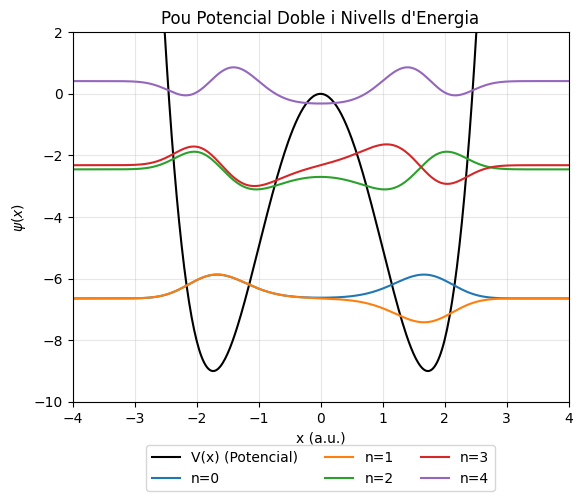

In [40]:
# Potencial V(x) com a fons
plt.plot(x, getV(x), color='black',label='V(x) (Potencial)')

# Representació de les 5 primeres funcions d'ona al seu nivell d'energia
for v in range(0, 5):
    # Desplacem la funció d'ona perquè es dibuixi a l'altura de la seva energia E[v]
    psi_plot = E[v] + psi[v]

    plt.plot(x, psi_plot, label=f'n={v}')

# Límits gràfica
plt.ylim(-10, 2)
plt.xlim(-4, 4)

plt.title("Pou Potencial Doble i Nivells d'Energia")
plt.xlabel("x (a.u.)")
plt.ylabel("$\psi(x)$")
# Posició llegenda perquè no tapi la gràfica
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.26), ncol=3)
plt.grid(alpha=0.3)
plt.show()

<>:14: SyntaxWarning: invalid escape sequence '\p'
<>:14: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipython-input-491/3513557427.py:14: SyntaxWarning: invalid escape sequence '\p'
  plt.ylabel("$|\psi(x)|^2$")


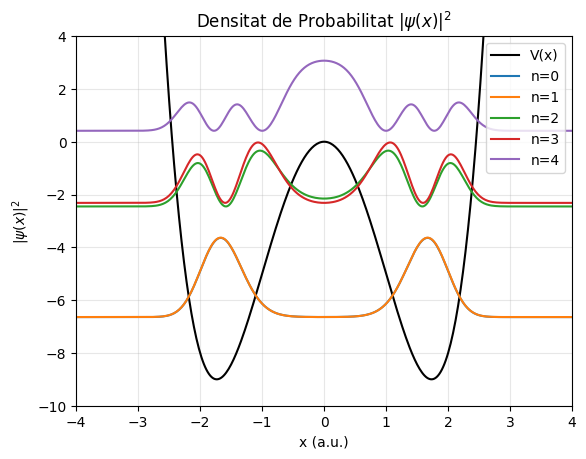

In [41]:
plt.plot(x, getV(x), color='black', label='V(x)')

scale2 = 5

for v in range(0, 5):
    densitat_probabilitat = psi[v]**2
    prob_plot = E[v] + scale2 * densitat_probabilitat
    plt.plot(x, prob_plot, label=f'n={v}')

plt.ylim(-10, 4)
plt.xlim(-4, 4)
plt.title(r"Densitat de Probabilitat $|\psi(x)|^2$")
plt.xlabel("x (a.u.)")
plt.ylabel("$|\psi(x)|^2$")
plt.legend(loc='upper right')
plt.grid(alpha=0.3)
plt.show()